# **Data Visualization**


<hr>


Download database file.


In [30]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = c:/progra~1/wget/etc/wgetrc
--2023-07-12 12:38:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud|169.45.118.108|:443... connected.
OpenSSL: error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol
Unable to establish SSL connection.


Connect to the database.


In [31]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [32]:
import pandas as pd

In [34]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [35]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [36]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [37]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


Plot a histogram of `ConvertedComp.`


array([[<Axes: title={'center': 'ConvertedComp'}>]], dtype=object)

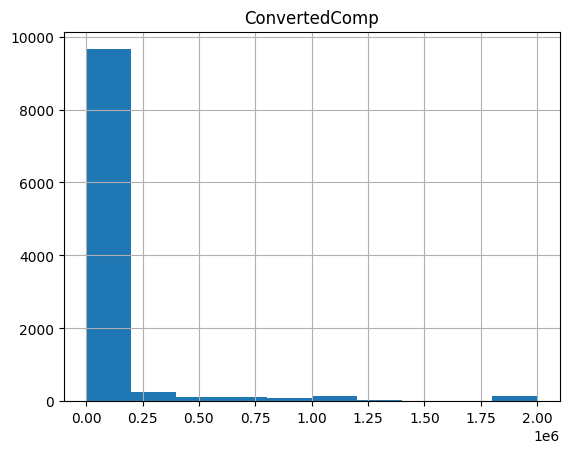

In [9]:
# your code goes here

QUERY = 'select ConvertedComp from master'

df = pd.read_sql_query(QUERY, conn)
df.hist()

Plot a box plot of `Age.`


<Axes: >

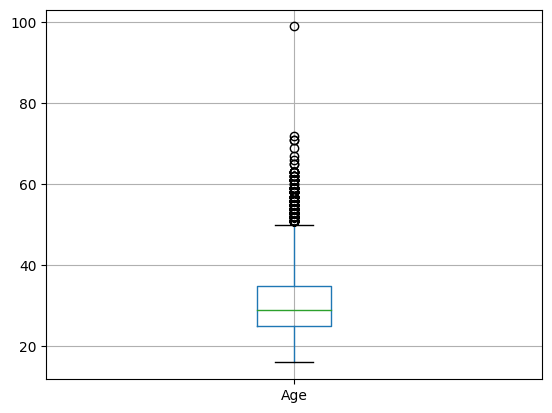

In [10]:
# your code goes here
QUERY = 'select Age from master'

df = pd.read_sql_query(QUERY,conn)
df.boxplot()


## Visualizing relationships in data


Create a scatter plot of `Age` and `WorkWeekHrs.`


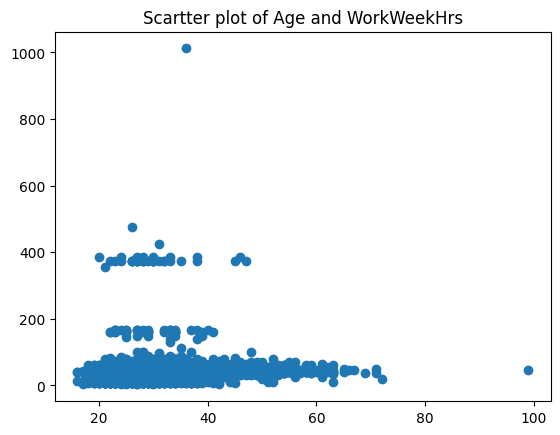

In [33]:
# your code goes here
import matplotlib.pyplot as plt

QUERY = 'select * from master'

df = pd.read_sql_query(QUERY,conn)

plt.scatter(df['Age'], df['WorkWeekHrs'])
plt.title('Scartter plot of Age and WorkWeekHrs')
plt.show()


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


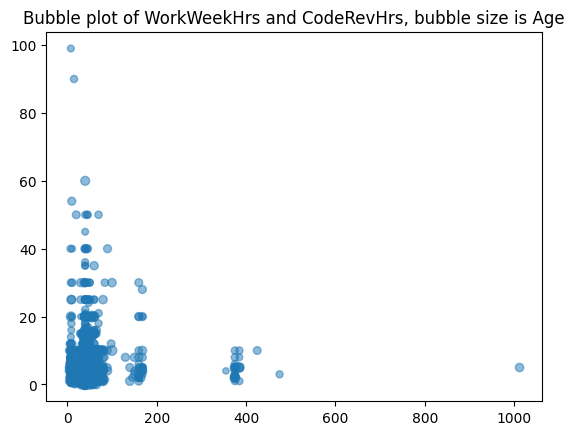

In [15]:
# your code goes here
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s = df['Age'], alpha = 0.5)
plt.title('Bubble plot of WorkWeekHrs and CodeRevHrs, bubble size is Age')
plt.show()

## Visualizing composition of data


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


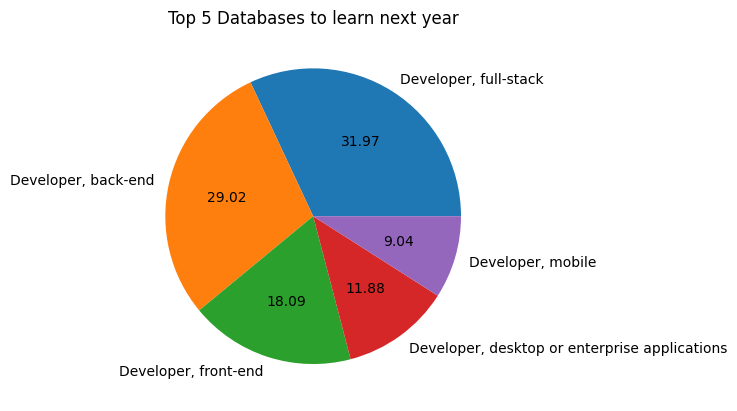

In [50]:
QUERY = 'select * from DevType'

df = pd.read_sql_query(QUERY, conn)
df_count=df['DevType'].value_counts().rename_axis('DevTypeName').reset_index(name='Counts')
df_top5=df_count.head()
plt.pie(df_top5['Counts'], labels = df_top5['DevTypeName'], autopct='%.2f')
plt.title('Top 5 Databases to learn next year')
plt.show()

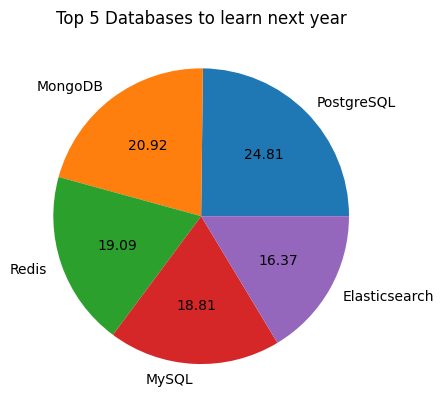

In [19]:
# your code goes here
QUERY = 'select * from DatabaseDesireNextYear'

df = pd.read_sql_query(QUERY, conn)
df_count=df['DatabaseDesireNextYear'].value_counts().rename_axis('DatabaseName').reset_index(name='Counts')
df_top5=df_count.head()
plt.pie(df_top5['Counts'], labels = df_top5['DatabaseName'], autopct='%.2f')
plt.title('Top 5 Databases to learn next year')
plt.show()



Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


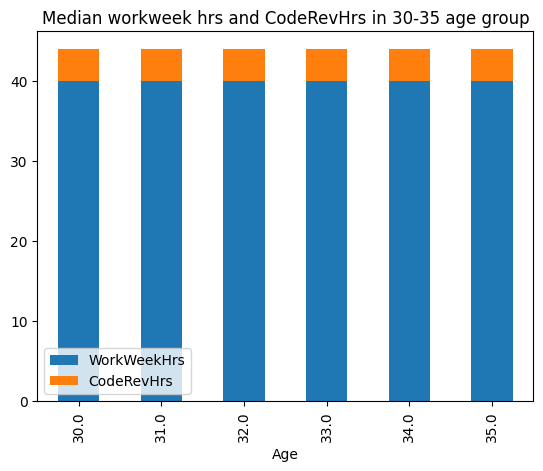

In [22]:
# your code goes here
QUERY = 'select WorkWeekHrs, CodeRevHrs, Age from master where Age between 30 and 35'
df = pd.read_sql_query(QUERY,conn)
df_g = df.groupby('Age').median()
df_g.plot(kind='bar', stacked=True, title='Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.show()



## Visualizing comparison of data


Plot the median `ConvertedComp` for all ages from 45 to 60.


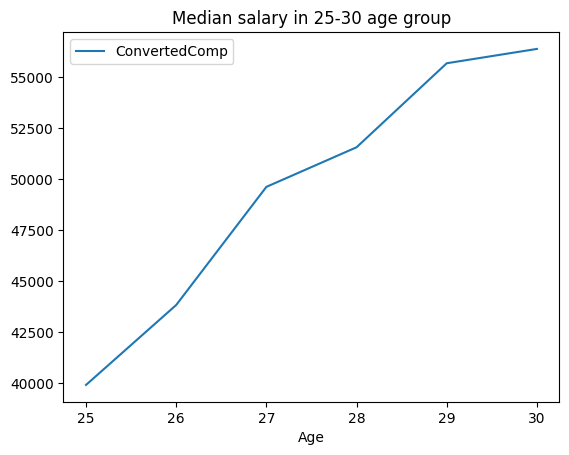

In [47]:
QUERY = 'select Age, ConvertedComp from master where Age between 25 and 30'
df = pd.read_sql_query(QUERY,conn)
df_g = df.groupby('Age').median()
df_g.plot(kind = 'line')
plt.title('Median salary in 25-30 age group')
plt.xlabel('Age')
plt.show()

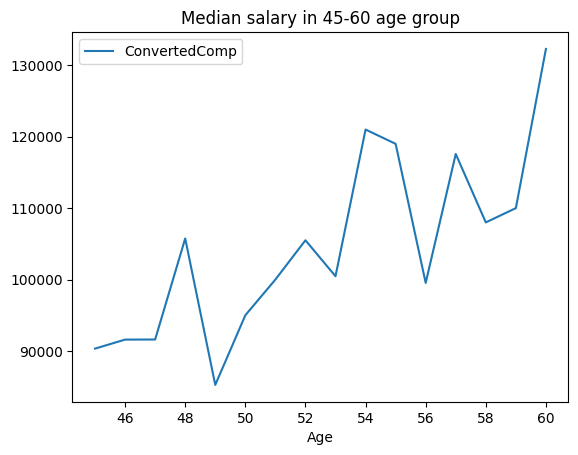

In [23]:
# your code goes here
QUERY = 'select Age, ConvertedComp from master where Age between 45 and 60'
df = pd.read_sql_query(QUERY,conn)
df_g = df.groupby('Age').median()
df_g.plot(kind = 'line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


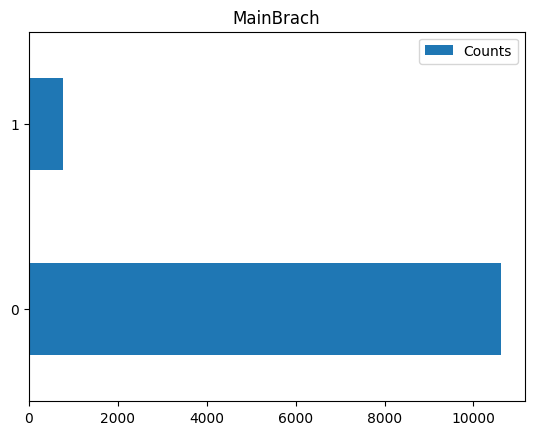

In [28]:
# your code goes here
QUERY = 'select MainBranch from master'
df = pd.read_sql_query(QUERY, conn)

df_c = df['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name = 'Counts')
df_c.plot(kind = 'barh')

plt.title('MainBrach')
plt.show()


Close the database connection.


In [29]:
conn.close()